In [ ]:
import warnings
warnings.filterwarnings("ignore")

# importing the required packages
import os
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# changing directory and verifying
%cd /content/drive/MyDrive/DISC_Files/with_cell
!ls -v

/content/drive/MyDrive/DISC_Files/with_cell
111.csv  142.csv  223.csv  263.csv  333.csv  414.csv  438.csv  463.csv	529.csv  556.csv   3311.csv
112.csv  143.csv  224.csv  264.csv  334.csv  415.csv  439.csv  464.csv	531.csv  557.csv   4110.csv
113.csv  144.csv  225.csv  311.csv  335.csv  416.csv  441.csv  465.csv	532.csv  561.csv   4111.csv
114.csv  151.csv  226.csv  312.csv  336.csv  417.csv  442.csv  466.csv	533.csv  562.csv   4210.csv
115.csv  152.csv  227.csv  313.csv  337.csv  418.csv  443.csv  467.csv	534.csv  563.csv   4211.csv
116.csv  153.csv  231.csv  314.csv  338.csv  419.csv  444.csv  511.csv	535.csv  564.csv   4310.csv
117.csv  154.csv  232.csv  315.csv  339.csv  421.csv  445.csv  512.csv	536.csv  565.csv   4311.csv
121.csv  161.csv  233.csv  316.csv  341.csv  422.csv  446.csv  513.csv	537.csv  566.csv   4410.csv
122.csv  162.csv  234.csv  317.csv  342.csv  423.csv  447.csv  514.csv	538.csv  567.csv   4411.csv
123.csv  163.csv  235.csv  318.csv  343.csv  424.csv  448.csv  51

In [ ]:
dfs = []

# read files (adjust the range as required), add the filename as a column, append the dataframes to a list
for i in range(111, 112):
    filename = f"{i}.csv"
    if os.path.exists(filename):
      print(f'Reading in {filename}')
      print('---')
      df = pd.read_csv(filename, header=None)
      # adding columns names
      df.columns = ['405', '488', '633', 'red', 'green', 'label']
      df['file_name'] = i
      dfs.append(df)

# concat all the dataframes into one
data = pd.concat(dfs, ignore_index=True)

# shape of the data
print(f'Shape of the data is: {data.shape}')

# viewing the data
print(data.head())

Reading in 111.csv
---
Shape of the data is: (5400000, 7)
        405       488       633  red     green  label  file_name
0  0.008535 -0.002965 -0.002028  0.0  0.013094      0        111
1  0.005164 -0.004470  0.000230  0.0  0.021478      0        111
2  0.004839 -0.006207  0.001352  0.0  0.029380      0        111
3  0.009197 -0.007472  0.002347  0.0  0.035826      0        111
4  0.016611 -0.007011  0.004466  0.0  0.038059      0        111


In [ ]:
# print the minimum values of each column
print("Minimum values:")
print(data.min())

# print the maximum values of each column
print("\nMaximum values:")
print(data.max())

Minimum values:
405           -0.032464
488           -0.031587
633           -0.060599
red            0.000000
green          0.000000
label          0.000000
file_name    111.000000
dtype: float64

Maximum values:
405            0.473276
488            0.149332
633            0.376739
red            0.116079
green          4.083605
label          1.000000
file_name    111.000000
dtype: float64


In [ ]:
# choose the filename for plotting
to_plot = 111

# create a data subset for plotting
data_plot = data[data['file_name'] == to_plot]

In [ ]:
# creating subsets for analysis
data_plot_0 = data_plot[data_plot['label'] == 0]
data_plot_1 = data_plot[data_plot['label'] == 1]

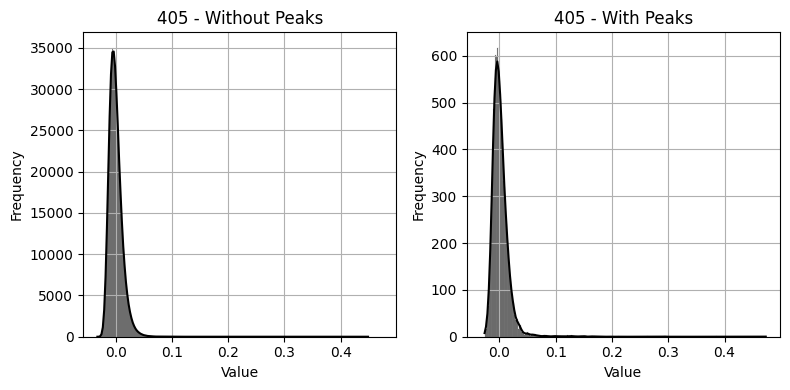

In [ ]:
# distribution of 405 frequency - caution: y axis in the two plots is in different scales

# creating subplots
fig, axs = plt.subplots(1, 2, figsize=(8,4), sharex = True)

# plot for category 0
sns.histplot(data=data_plot_0, x='405', kde=True, color='black', ax=axs[0])
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)
axs[0].set_title('405 - Without Peaks')

# plot for category 1
sns.histplot(data=data_plot_1, x='405', kde=True, color='black', ax=axs[1])
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)
axs[1].set_title('405 - With Peaks')

plt.tight_layout()
plt.show()

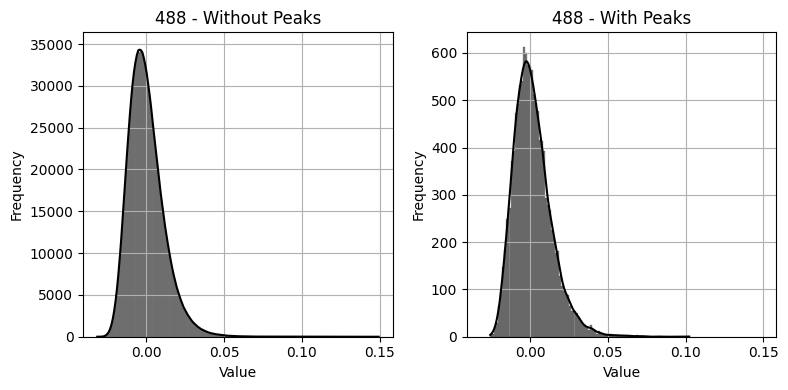

In [ ]:
# distribution of 488 frequency - caution: y axis in the two plots is in different scales

# creating subplots
fig, axs = plt.subplots(1, 2, figsize=(8,4), sharex = True)

# plot for category 0
sns.histplot(data=data_plot_0, x='488', kde=True, color='black', ax=axs[0])
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)
axs[0].set_title('488 - Without Peaks')

# plot for category 1
sns.histplot(data=data_plot_1, x='488', kde=True, color='black', ax=axs[1])
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)
axs[1].set_title('488 - With Peaks')

plt.tight_layout()
plt.show()

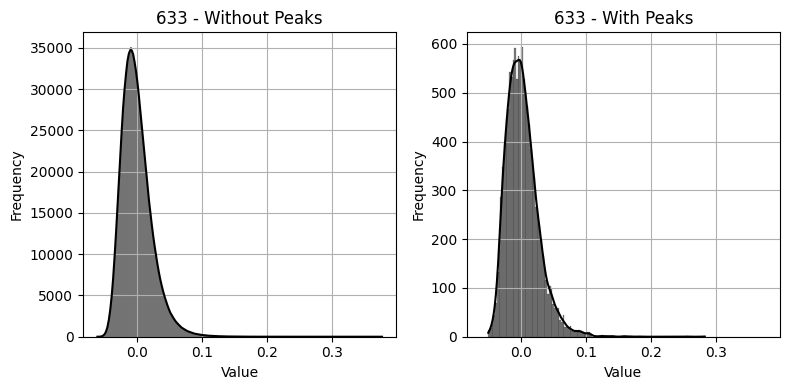

In [ ]:
# distribution of 633 frequency - caution: y axis in the two plots is in different scales

# creating subplots
fig, axs = plt.subplots(1, 2, figsize=(8,4), sharex = True)

# plot for category 0
sns.histplot(data=data_plot_0, x='633', kde=True, color='black', ax=axs[0])
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)
axs[0].set_title('633 - Without Peaks')

# plot for category 1
sns.histplot(data=data_plot_1, x='633', kde=True, color='black', ax=axs[1])
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)
axs[1].set_title('633 - With Peaks')

plt.tight_layout()
plt.show()

In [ ]:
# initializing a empty dataframe
corr_df = pd.DataFrame(columns=['K', 'No Peaks/Peaks', '405 vs 488', '488 vs 633', '405 vs 633'])

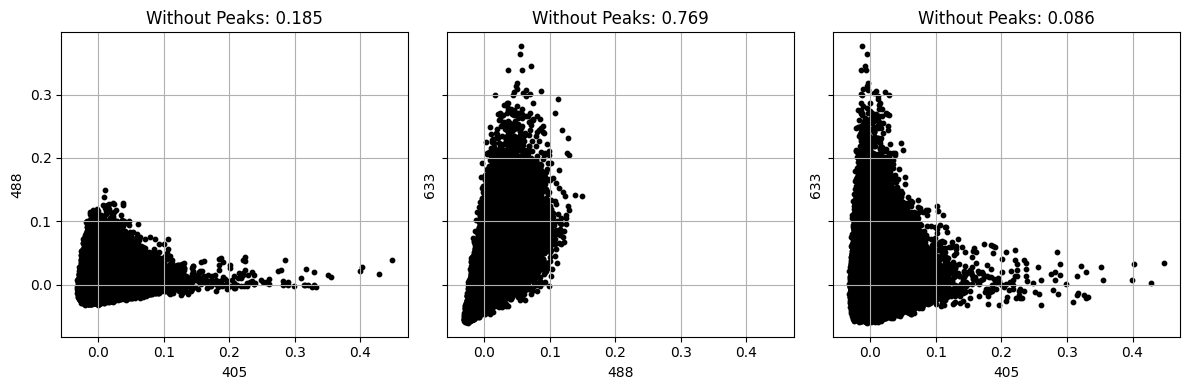

In [ ]:
# K = 0
# Without Peaks
corr_value_1 = data_plot_0['405'].corr(data_plot_0['488'])
corr_value_2 = data_plot_0['488'].corr(data_plot_0['633'])
corr_value_3 = data_plot_0['405'].corr(data_plot_0['633'])
corr_df.loc[0] = ['0', 'Without Peaks', round(corr_value_1,3), round(corr_value_2,3), round(corr_value_3,3)]

# creating subplots
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharex = True, sharey = True)

# plot for 405 vs 488
axs[0].scatter(data_plot_0['405'], data_plot_0['488'], color='black', s=10)
axs[0].set_xlabel('405')
axs[0].set_ylabel('488')
axs[0].grid(True)
axs[0].set_title(f'Without Peaks: {corr_value_1:.3f}')

# plot for 488 vs 633
axs[1].scatter(data_plot_0['488'], data_plot_0['633'], color='black', s=10)
axs[1].set_xlabel('488')
axs[1].set_ylabel('633')
axs[1].grid(True)
axs[1].set_title(f'Without Peaks: {corr_value_2:.3f}')

# plot for 405 vs 633
axs[2].scatter(data_plot_0['405'], data_plot_0['633'], color='black', s=10)
axs[2].set_xlabel('405')
axs[2].set_ylabel('633')
axs[2].grid(True)
axs[2].set_title(f'Without Peaks: {corr_value_3:.3f}')

plt.tight_layout()
plt.show()

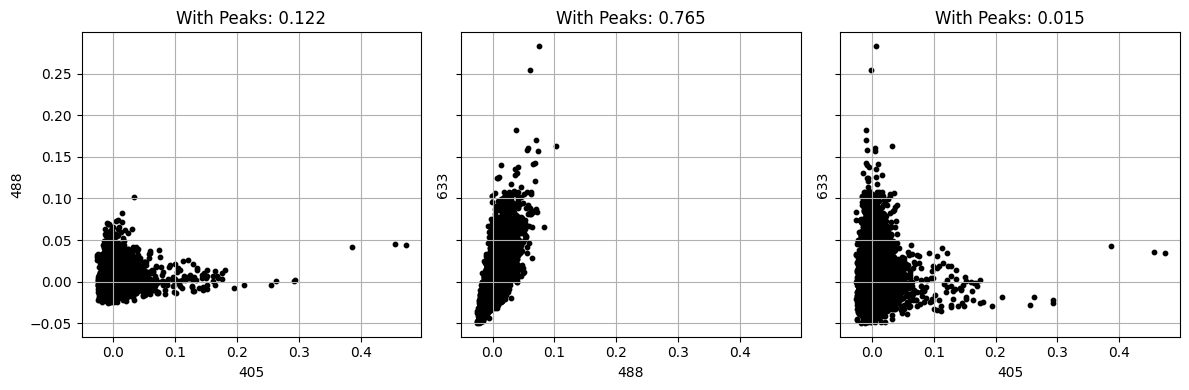

In [ ]:
# K = 0
# With Peaks
corr_value_1 = data_plot_1['405'].corr(data_plot_1['488'])
corr_value_2 = data_plot_1['488'].corr(data_plot_1['633'])
corr_value_3 = data_plot_1['405'].corr(data_plot_1['633'])
corr_df.loc[1] = ['0', 'With Peaks', round(corr_value_1,3), round(corr_value_2,3), round(corr_value_3,3)]

# creating subplots
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharex = True, sharey = True)

# plot for 405 vs 488
axs[0].scatter(data_plot_1['405'], data_plot_1['488'], color='black', s=10)
axs[0].set_xlabel('405')
axs[0].set_ylabel('488')
axs[0].grid(True)
axs[0].set_title(f'With Peaks: {corr_value_1:.3f}')

# plot for 488 vs 633
axs[1].scatter(data_plot_1['488'], data_plot_1['633'], color='black', s=10)
axs[1].set_xlabel('488')
axs[1].set_ylabel('633')
axs[1].grid(True)
axs[1].set_title(f'With Peaks: {corr_value_2:.3f}')

# plot for 405 vs 633
axs[2].scatter(data_plot_1['405'], data_plot_1['633'], color='black', s=10)
axs[2].set_xlabel('405')
axs[2].set_ylabel('633')
axs[2].grid(True)
axs[2].set_title(f'With Peaks: {corr_value_3:.3f}')

plt.tight_layout()
plt.show()

In [ ]:
data_plot['label'].value_counts()

label
0    5387833
1      12167
Name: count, dtype: int64

In [ ]:
# creating a ‘label_modified’ column based on the original ‘label’ column.
# if there are 13 consecutive points with 1, it is retained as 1, otherwise, it is changed to 0.
counter = 0
data_plot.loc[:, 'label_modified'] = 0

# iterate through the dataframe rows
for index, row in data_plot.iterrows():
  if row['label'] == 1:
    counter += 1
  else:
    if counter >= 13:
      data_plot.loc[index - counter:index - 1, 'label_modified'] = 1
    counter = 0

In [ ]:
data_plot['label_modified'].value_counts()

label_modified
0    5399676
1        324
Name: count, dtype: int64

In [ ]:
# creating subsets for analysis
data_plot_0 = data_plot[data_plot['label_modified'] == 0]
data_plot_1 = data_plot[data_plot['label_modified'] == 1]

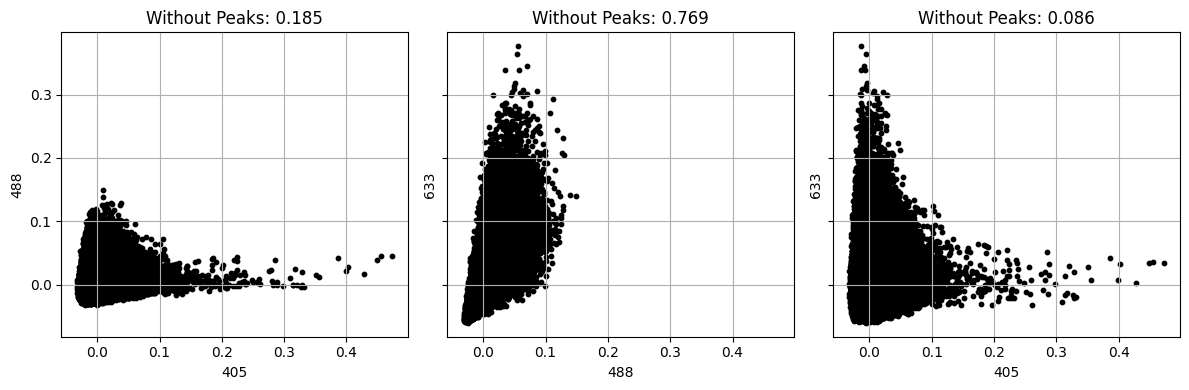

In [ ]:
# K = 13
# Without Peaks
corr_value_1 = data_plot_0['405'].corr(data_plot_0['488'])
corr_value_2 = data_plot_0['488'].corr(data_plot_0['633'])
corr_value_3 = data_plot_0['405'].corr(data_plot_0['633'])
corr_df.loc[2] = ['13', 'Without Peaks', round(corr_value_1,3), round(corr_value_2,3), round(corr_value_3,3)]

# creating subplots
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharex = True, sharey = True)

# plot for 405 vs 488
axs[0].scatter(data_plot_0['405'], data_plot_0['488'], color='black', s=10)
axs[0].set_xlabel('405')
axs[0].set_ylabel('488')
axs[0].grid(True)
axs[0].set_title(f'Without Peaks: {corr_value_1:.3f}')

# plot for 488 vs 633
axs[1].scatter(data_plot_0['488'], data_plot_0['633'], color='black', s=10)
axs[1].set_xlabel('488')
axs[1].set_ylabel('633')
axs[1].grid(True)
axs[1].set_title(f'Without Peaks: {corr_value_2:.3f}')

# plot for 405 vs 633
axs[2].scatter(data_plot_0['405'], data_plot_0['633'], color='black', s=10)
axs[2].set_xlabel('405')
axs[2].set_ylabel('633')
axs[2].grid(True)
axs[2].set_title(f'Without Peaks: {corr_value_3:.3f}')

plt.tight_layout()
plt.show()

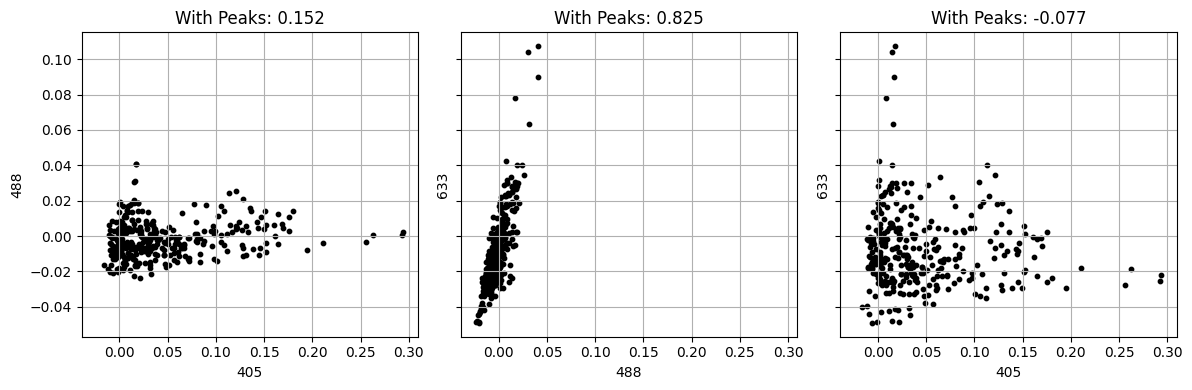

In [ ]:
# K = 13
# With Peaks
corr_value_1 = data_plot_1['405'].corr(data_plot_1['488'])
corr_value_2 = data_plot_1['488'].corr(data_plot_1['633'])
corr_value_3 = data_plot_1['405'].corr(data_plot_1['633'])
corr_df.loc[3] = ['13', 'With Peaks', round(corr_value_1,3), round(corr_value_2,3), round(corr_value_3,3)]

# creating subplots
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharex = True, sharey = True)

# plot for 405 vs 488
axs[0].scatter(data_plot_1['405'], data_plot_1['488'], color='black', s=10)
axs[0].set_xlabel('405')
axs[0].set_ylabel('488')
axs[0].grid(True)
axs[0].set_title(f'With Peaks: {corr_value_1:.3f}')

# plot for 488 vs 633
axs[1].scatter(data_plot_1['488'], data_plot_1['633'], color='black', s=10)
axs[1].set_xlabel('488')
axs[1].set_ylabel('633')
axs[1].grid(True)
axs[1].set_title(f'With Peaks: {corr_value_2:.3f}')

# plot for 405 vs 633
axs[2].scatter(data_plot_1['405'], data_plot_1['633'], color='black', s=10)
axs[2].set_xlabel('405')
axs[2].set_ylabel('633')
axs[2].grid(True)
axs[2].set_title(f'With Peaks: {corr_value_3:.3f}')

plt.tight_layout()
plt.show()

In [ ]:
# creating a ‘label_modified’ column based on the original ‘label’ column.
# if there are 18 consecutive points with 1, it is retained as 1, otherwise, it is changed to 0.
counter = 0
data_plot.loc[:, 'label_modified'] = 0

# iterate through the dataframe rows
for index, row in data_plot.iterrows():
  if row['label'] == 1:
    counter += 1
  else:
    if counter >= 18:
      data_plot.loc[index - counter:index - 1, 'label_modified'] = 1
    counter = 0

In [ ]:
data_plot['label_modified'].value_counts()

label_modified
0    5399900
1        100
Name: count, dtype: int64

In [ ]:
# creating subsets for analysis
data_plot_0 = data_plot[data_plot['label_modified'] == 0]
data_plot_1 = data_plot[data_plot['label_modified'] == 1]

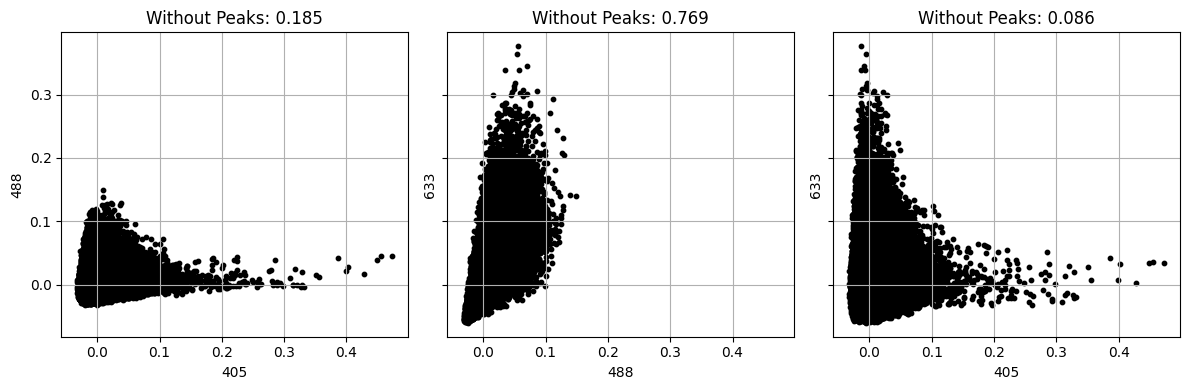

In [ ]:
# K = 18
# Without Peaks
corr_value_1 = data_plot_0['405'].corr(data_plot_0['488'])
corr_value_2 = data_plot_0['488'].corr(data_plot_0['633'])
corr_value_3 = data_plot_0['405'].corr(data_plot_0['633'])
corr_df.loc[4] = ['18', 'Without Peaks', round(corr_value_1,3), round(corr_value_2,3), round(corr_value_3,3)]

# creating subplots
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharex = True, sharey = True)

# plot for 405 vs 488
axs[0].scatter(data_plot_0['405'], data_plot_0['488'], color='black', s=10)
axs[0].set_xlabel('405')
axs[0].set_ylabel('488')
axs[0].grid(True)
axs[0].set_title(f'Without Peaks: {corr_value_1:.3f}')

# plot for 488 vs 633
axs[1].scatter(data_plot_0['488'], data_plot_0['633'], color='black', s=10)
axs[1].set_xlabel('488')
axs[1].set_ylabel('633')
axs[1].grid(True)
axs[1].set_title(f'Without Peaks: {corr_value_2:.3f}')

# plot for 405 vs 633
axs[2].scatter(data_plot_0['405'], data_plot_0['633'], color='black', s=10)
axs[2].set_xlabel('405')
axs[2].set_ylabel('633')
axs[2].grid(True)
axs[2].set_title(f'Without Peaks: {corr_value_3:.3f}')

plt.tight_layout()
plt.show()

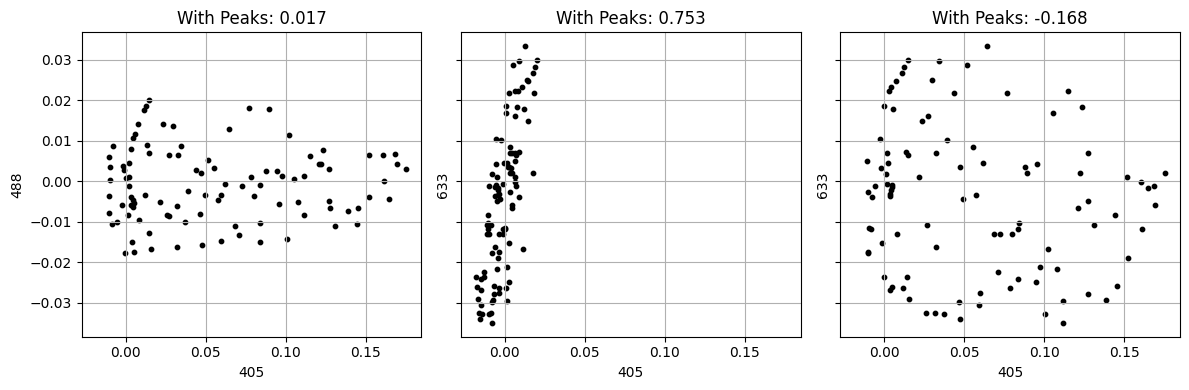

In [ ]:
# K = 18
# With Peaks
corr_value_1 = data_plot_1['405'].corr(data_plot_1['488'])
corr_value_2 = data_plot_1['488'].corr(data_plot_1['633'])
corr_value_3 = data_plot_1['405'].corr(data_plot_1['633'])
corr_df.loc[5] = ['18', 'With Peaks', round(corr_value_1,3), round(corr_value_2,3), round(corr_value_3,3)]

# creating subplots
fig, axs = plt.subplots(1, 3, figsize=(12,4), sharex = True, sharey = True)

# plot for 405 vs 488
axs[0].scatter(data_plot_1['405'], data_plot_1['488'], color='black', s=10)
axs[0].set_xlabel('405')
axs[0].set_ylabel('488')
axs[0].grid(True)
axs[0].set_title(f'With Peaks: {corr_value_1:.3f}')

# plot for 488 vs 633
axs[1].scatter(data_plot_1['488'], data_plot_1['633'], color='black', s=10)
axs[1].set_xlabel('405')
axs[1].set_ylabel('633')
axs[1].grid(True)
axs[1].set_title(f'With Peaks: {corr_value_2:.3f}')

# plot for 405 vs 633
axs[2].scatter(data_plot_1['405'], data_plot_1['633'], color='black', s=10)
axs[2].set_xlabel('405')
axs[2].set_ylabel('633')
axs[2].grid(True)
axs[2].set_title(f'With Peaks: {corr_value_3:.3f}')

plt.tight_layout()
plt.show()

In [ ]:
print(corr_df)

    K No Peaks/Peaks  405 vs 488  488 vs 633  405 vs 633
0   0  Without Peaks       0.185       0.769       0.086
1   0     With Peaks       0.122       0.765       0.015
2  13  Without Peaks       0.185       0.769       0.086
3  13     With Peaks       0.152       0.825      -0.077
4  18  Without Peaks       0.185       0.769       0.086
5  18     With Peaks       0.017       0.753      -0.168
